# Fatigue Analysis

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
data = pd.read_csv("Sleep_Data_Sampled.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [5]:
# Change BMI Category 'Normal Weight' to 'Normal'

data.replace("Normal Weight", "Normal", inplace=True)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [13]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,4330.271354,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
print(data['Occupation'].unique())
print(data['BMI Category'].unique())
print(data['Blood Pressure'].unique())
print(data['Sleep Disorder'].unique())

['Doctor' 'Teacher' 'Software Engineer' 'Lawyer' 'Engineer' 'Accountant'
 'Nurse' 'Scientist' 'Manager' 'Salesperson' 'Sales Representative']
['Normal' 'Overweight' 'Obese']
['120/80' '135/90' '126/83' '125/80' '130/85' '140/95' '115/75' '122/80'
 '118/76' '128/85' '128/84' '119/77' '125/82' '118/75' '115/78' '121/79'
 '117/76' '140/90' '135/88' '129/84' '130/86' '139/91' '132/87' '131/86'
 '142/92']
['Healthy' 'Sleep Apnea' 'Insomnia']


In [ ]:
# data = pd.get_dummies(data, prefix=["gen","occ", "bmi", "blood", "sleep"],columns=["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"], dtype=int)
# data.head()

In [7]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

In [9]:
def column_index(df, query_cols):
  '''
  returns the indices of the query_cols
  '''
  cols = df.columns.values
  sidx = np.argsort(cols)
  return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [11]:
data = data.drop('Person ID', axis=1)


In [13]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [15]:
cat_cols = data.select_dtypes(include='object')
categorical_indices = column_index(data, cat_cols.columns)
categorical = list(categorical_indices)

In [19]:
cost = []
for cluster in range(1,10):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_jobs=-1,n_init=10,verbose=1)
    kproto.fit(data, categorical=categorical)
    cost.append(kproto.cost_)

1\.cluster start
Best run was number 1
2\.cluster start
Best run was number 1
3\.cluster start
Best run was number 1
4\.cluster start
Best run was number 8
5\.cluster start
Best run was number 3
6\.cluster start
Best run was number 6
7\.cluster start
Best run was number 6
8\.cluster start
Best run was number 3
9\.cluster start
Best run was number 6


In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

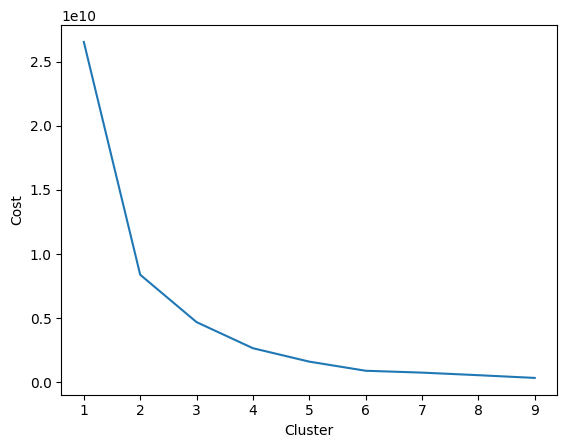

In [23]:
plt.plot(range(1,10),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [25]:
kproto = KPrototypes(n_clusters = 4, init='Huang',n_jobs=-1,n_init=10,verbose=1)
kproto.fit(data, categorical=categorical)
#centroids  -> clusters, features
centroids = kproto.cluster_centroids_
labels  = kproto.labels_

Best run was number 10


In [27]:
data['Labels'] = labels
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
0,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy,3
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy,3
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy,0
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy,0
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy,0


In [29]:
cluster1 = data[data['Labels']==0]
cluster2 = data[data['Labels']==1]
cluster3 = data[data['Labels']==2]
cluster4 = data[data['Labels']==3]

In [31]:
cluster1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy,0
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy,0
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy,0
7,Male,40,Engineer,8.05,8,52,4,Normal,120/80,68,6500,Healthy,0
8,Male,36,Lawyer,6.85,7,60,6,Normal,130/85,71,6500,Healthy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,Female,52,Accountant,6.50,7,45,7,Overweight,130/85,72,6000,Insomnia,0
14934,Female,52,Accountant,6.60,7,45,7,Overweight,130/85,72,6000,Insomnia,0
14935,Female,52,Accountant,6.60,7,45,7,Overweight,130/85,72,6000,Insomnia,0
14936,Female,52,Accountant,6.60,7,45,7,Overweight,130/85,72,6000,Insomnia,0


In [33]:
cluster2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
6,Male,44,Engineer,7.85,8,45,4,Normal,125/80,65,5000,Healthy,1
32,Male,42,Engineer,7.80,8,45,4,Normal,125/80,65,5000,Healthy,1
34,Female,44,Doctor,7.25,8,30,6,Normal,125/80,68,5000,Healthy,1
39,Male,41,Engineer,7.30,8,30,6,Normal,125/80,68,5000,Healthy,1
47,Female,39,Engineer,7.30,8,36,4,Normal,125/80,71,4600,Healthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,Female,54,Engineer,8.40,9,30,3,Normal,125/80,65,5000,Healthy,1
14963,Female,54,Engineer,8.40,9,30,3,Normal,125/80,65,5000,Healthy,1
14964,Female,54,Engineer,8.50,9,30,3,Normal,125/80,65,5000,Healthy,1
14965,Female,55,Nurse,8.10,9,75,4,Overweight,140/95,72,5000,Sleep Apnea,1


In [35]:
cluster3

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
17,Male,34,Doctor,7.55,8,68,6,Normal,120/80,69,8000,Healthy,2
18,Male,35,Lawyer,7.00,7,75,6,Normal,130/85,72,9000,Healthy,2
22,Male,30,Doctor,7.80,7,75,6,Normal,120/80,70,8000,Healthy,2
24,Male,30,Doctor,7.80,7,75,6,Normal,120/80,70,8000,Healthy,2
25,Female,44,Nurse,6.65,7,75,6,Normal,140/95,72,8500,Healthy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,Female,51,Nurse,6.00,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,2
14930,Female,51,Nurse,6.10,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,2
14931,Female,51,Nurse,6.10,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,2
14967,Female,56,Doctor,8.20,9,90,3,Normal,118/75,65,10000,Healthy,2


In [37]:
cluster4

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
0,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy,3
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy,3
5,Male,33,Doctor,6.90,7,50,6,Normal,120/80,69,7500,Healthy,3
13,Female,33,Accountant,6.60,7,45,6,Normal,120/80,69,7500,Healthy,3
16,Female,34,Accountant,7.50,8,68,5,Normal,115/75,69,7500,Healthy,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,3
14996,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,3
14997,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,3
14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,3


In [79]:
data[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", 'Labels']].groupby('Labels').agg(['min','max','median' ,'mean']).T

Labels                                    0            1             2  \
Age                     min       28.000000    27.000000     28.000000   
                        max       57.000000    55.000000     58.000000   
                        median    44.000000    42.000000     50.000000   
                        mean      43.123796    42.021285     46.601006   
Sleep Duration          min        5.900000     5.800000      5.900000   
                        max        8.300000     8.500000      8.200000   
                        median     6.600000     6.800000      7.050000   
                        mean       6.860637     6.953704      6.936756   
Quality of Sleep        min        5.000000     4.000000      6.000000   
                        max        9.000000     9.000000      9.000000   
                        median     7.000000     6.000000      8.000000   
                        mean       6.771669     6.803930      7.322157   
Physical Activity Level min       30.000000    30.000000     30.000000   
                        max       88.000000    85.000000     90.000000   
                        median    45.000000    42.000000     82.000000   
                        mean      49.243565    44.937372     79.606035   
Stress Level            min        3.000000     3.000000      3.000000   
                        max        8.000000     8.000000      8.000000   
                        median     6.000000     6.000000      6.000000   
                        mean       5.636666     5.719198      6.354009   
Heart Rate              min       65.000000    65.000000     65.000000   
                        max       80.000000    86.000000     75.000000   
                        median    68.000000    74.000000     72.000000   
                        mean      69.534933    73.365534     71.854987   
Daily Steps             min     5600.000000  3000.000000   8000.000000   
                        max     6650.000000  5550.000000  10000.000000   
                        median  6000.000000  5000.000000   8500.000000   
                        mean    6142.155489  4992.591077   8676.725342   

Labels                                    3  
Age                     min       30.000000  
                        max       59.000000  
                        median    43.000000  
                        mean      44.761861  
Sleep Duration          min        5.850000  
                        max        8.350000  
                        median     7.350000  
                        mean       7.335246  
Quality of Sleep        min        5.000000  
                        max        9.000000  
                        median     8.000000  
                        mean       7.795531  
Physical Activity Level min       35.000000  
                        max       88.000000  
                        median    68.000000  
                        mean      68.243955  
Stress Level            min        3.000000  
                        max        8.000000  
                        median     4.000000  
                        mean       4.872360  
Heart Rate              min       65.000000  
                        max       80.000000  
                        median    69.000000  
                        mean      70.201408  
Daily Steps             min     6750.000000  
                        max     7750.000000  
                        median  7000.000000  
                        mean    7222.972146

In [83]:
data[["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder", "Labels"]].groupby('Labels').describe(include='object').T

Labels                           0           1            2            3
Gender         count          5711        2443         3579         3267
               unique            2           2            2            2
               top          Female        Male       Female       Female
               freq           2891        1258         2373         2120
Occupation     count          5711        2443         3579         3267
               unique           11          11            8           10
               top     Salesperson    Engineer        Nurse        Nurse
               freq           1530         515         2274         1227
BMI Category   count          5711        2443         3579         3267
               unique            3           3            2            3
               top      Overweight  Overweight   Overweight       Normal
               freq           3683        1134         2340         1609
Blood Pressure count          5711        2443         3579         3267
               unique           24          19           11           22
               top          130/85      125/80       140/95       140/95
               freq           2286         625         2269         1155
Sleep Disorder count          5711        2443         3579         3267
               unique            3           3            3            3
               top        Insomnia    Insomnia  Sleep Apnea  Sleep Apnea
               freq           3182        1259         2325         1427

0 - 3 (Level Fatigue, Higher is less fatigue)

## Machine Learning

In [102]:
target = data['Labels']
data = data.drop('Labels', axis=1)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [104]:
target

0        3
1        3
2        0
3        0
4        0
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: Labels, Length: 15000, dtype: uint16

In [106]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [108]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [110]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category',
                                                   'Blood Pressure',
                                                   'Sleep Disorder']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'Sleep Duration',
                                                   'Quality of Sleep',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [114]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [116]:
_ = model.fit(data_train, target_train)

In [118]:
data_test

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
11499,Female,44,Teacher,6.55,6,45,6,Overweight,135/90,68,6000,Insomnia
6475,Female,32,Scientist,6.75,6,54,7,Normal,131/86,76,6600,Sleep Apnea
13167,Female,48,Teacher,7.40,8,38,4,Normal,135/90,65,5500,Insomnia
862,Male,35,Lawyer,6.65,7,45,6,Normal,130/85,70,6500,Healthy
5970,Female,44,Nurse,6.75,6,75,6,Obese,140/95,80,6650,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
2102,Male,34,Doctor,7.65,8,68,5,Normal,120/80,70,8000,Healthy
13903,Male,44,Teacher,7.15,8,68,4,Normal,130/85,68,7000,Insomnia
11863,Male,42,Salesperson,7.00,7,68,6,Normal,130/85,71,7000,Insomnia
2656,Male,37,Manager,6.50,6,42,6,Overweight,125/82,72,6750,Healthy


In [120]:
model.predict(data_test)

array([0, 0, 1, ..., 3, 0, 2], dtype=uint16)

In [122]:
model.score(data_test, target_test)

0.9965333333333334

# Evaluation of the model with cross-validation

In [125]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.16699648, 0.16101384, 0.16499734, 0.168998  , 0.17399931]),
 'score_time': array([0.00800347, 0.00801396, 0.00800204, 0.00700092, 0.00800204]),
 'test_score': array([0.988     , 0.99066667, 0.99733333, 0.99933333, 0.94133333])}

In [127]:
scores = cv_results["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.983 ± 0.021


# Fitting a more powerful model

In [130]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)

preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_columns)],
    remainder="passthrough",
)

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [132]:
%%time
_ = model.fit(data_train, target_train)

CPU times: total: 922 ms
Wall time: 380 ms


In [134]:
model.score(data_test, target_test)

1.0

# Save the model

In [137]:
import pickle

# save the iris classification model as a pickle file
model_fatigue_anal = "fatigue_anal_model.pkl"  

with open(model_fatigue_anal, 'wb') as file:  
    pickle.dump(model, file)